In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importación librerias

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Lista los dispositivos físicos de tipo GPU
gpus = tf.config.list_physical_devices('GPU')
print("GPUs disponibles:", gpus)

# Cargar imagénes

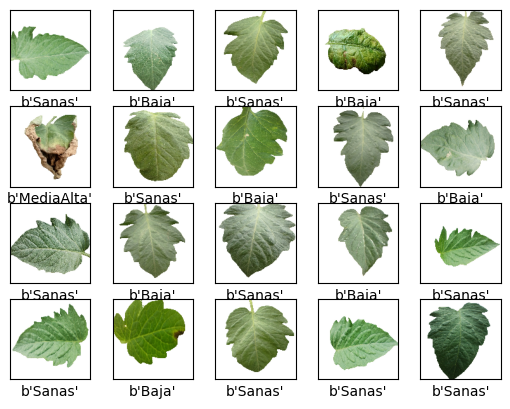

In [ ]:
def cargar_imagen(ruta):
    imagen = tf.io.read_file(ruta)
    etiqueta = tf.strings.split(ruta, sep='/')[-2]
    imagen = tf.image.decode_jpeg(imagen, channels=3)  # Decodificar la imagen
    imagen = tf.image.resize(imagen, (128, 128))  # Ajustar el tamaño de la imagen según tus necesidades
    imagen = tf.cast(imagen, tf.uint8)
    return imagen, etiqueta

# def obtener_etiqueta(ruta):

#   print(etiqueta)
#   return etiqueta

# Obtener la lista de archivos y sus etiquetas
dataset = tf.data.Dataset.list_files("/content/drive/MyDrive/hojas_tomate/*/*.jpg")
# etiquetas = lista_archivos.map(lambda x: obtener_etiqueta(x))

# Combina las rutas de archivo y las etiquetas
# dataset = list
# print(list(dataset))

# Aplicar la función de mapeo
dataset = dataset.map(lambda x: cargar_imagen(x), num_parallel_calls=tf.data.AUTOTUNE)

for i, (imagen, etiqueta) in enumerate(dataset.take(20)):
  plt.subplot(4, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(etiqueta.numpy())
  plt.imshow(imagen)
  # print("Etiqueta:", etiqueta.numpy())


# Totalidad de imagenes (Total, Entrenamiento, Validación y Prueba)

In [ ]:
# Obtener la cantidad total de ejemplos en tu conjunto de datos
num_hojas = len(dataset)
print('Total de hojas:', num_hojas)

# Definir las proporciones para la división (porcentaje de entrenamiento, validación y prueba)
porcentaje_entrenamiento = 0.70
porcentaje_validacion = 0.15
porcentaje_prueba = 0.15

# Calcular el tamaño de cada conjunto
tamano_entrenamiento = int(porcentaje_entrenamiento * num_hojas)
tamano_validacion = int(porcentaje_validacion * num_hojas)
tamano_prueba = num_hojas - tamano_entrenamiento - tamano_validacion

# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
datos_train = dataset.take(tamano_entrenamiento)
datos_validacion = dataset.skip(tamano_entrenamiento).take(tamano_validacion)
datos_prueba = dataset.skip(tamano_entrenamiento + tamano_validacion).take(tamano_prueba)

print('Entrenamiento:',len(datos_train))
print('Validación:',len(datos_validacion))
print('Prueba:',len(datos_prueba))

Total de hojas: 3560
Entrenamiento: 2492
Validación: 534
Prueba: 534


# Manipular y visualizar el set

<_TakeDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


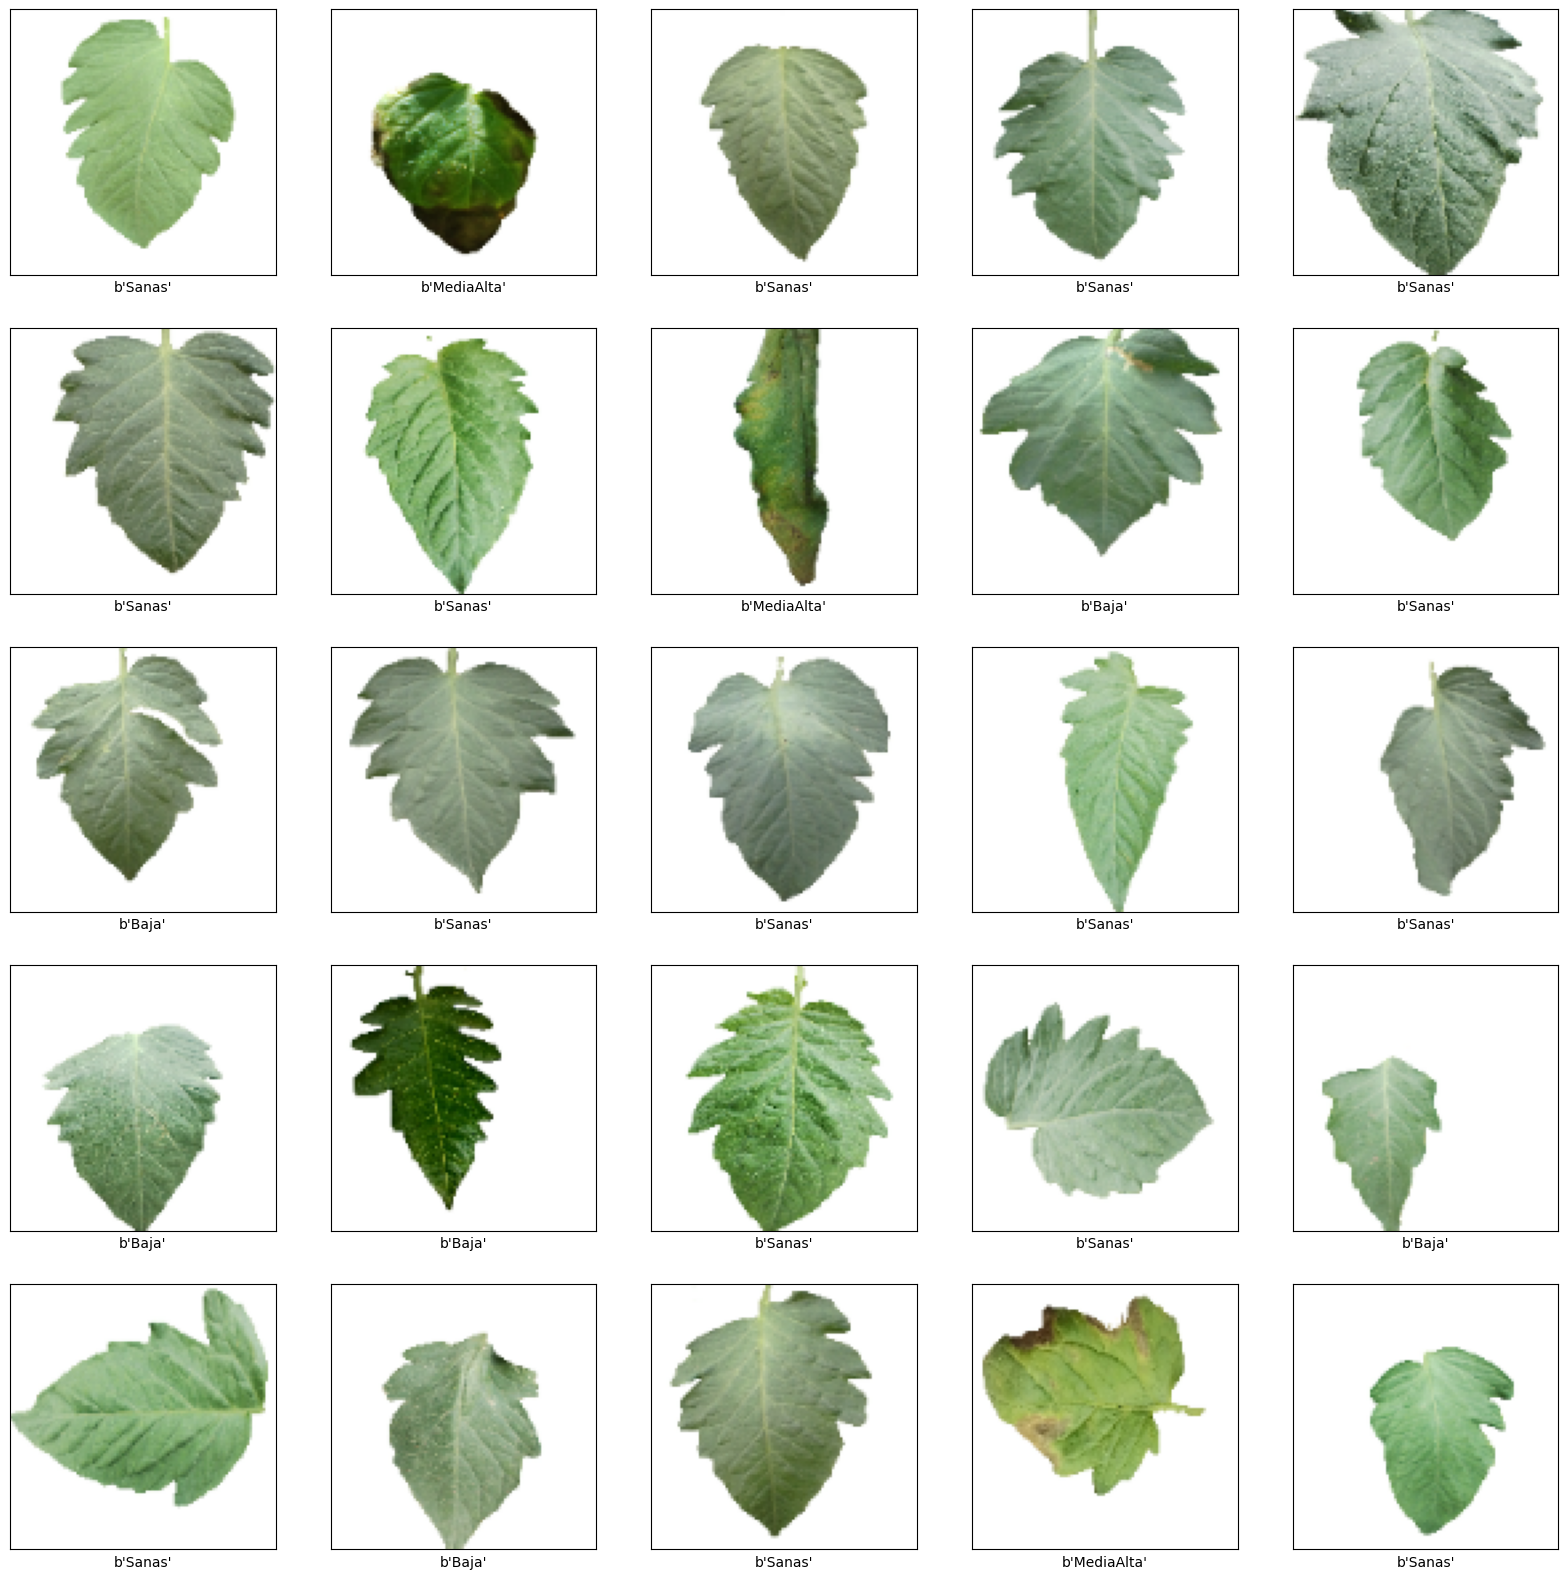

In [ ]:
# Lo pasamos a TAMANO_IMG (100x100) y a blanco y negro (solo para visualizar

plt.figure(figsize=(20,20))

TAMANO_IMG=100

print(datos_train)

for i, (imagen, etiqueta) in enumerate(datos_train.take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(etiqueta.numpy())
  plt.imshow(imagen)

In [ ]:
#Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [ ]:
datos_test=[]

# Separación de Datos
- Entrenamiento

In [ ]:
# 1) Define una función de pre-procesado usando tf.image.resize
def preprocess(imagen, etiqueta):
    # imagen es un tf.Tensor [h, w, 3], dtype uint8 o float32
    imagen = tf.image.resize(imagen, [TAMANO_IMG, TAMANO_IMG])
    # si necesitas normalizar:
    imagen = imagen / 255.0
    return imagen, etiqueta

- Versión antigua for (Mas lenta)

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos_train): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # imagen = cv2.cvtColor(imagen)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 3)
  datos_entrenamiento.append([imagen, etiqueta])

- Versión nueva (Más eficiente)

In [ ]:
# 2) Aplica el map en paralelo y prefetch
datos_train_pp = (
    datos_train
      .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
      .repeat()
      .batch(32)                       # o el batch que uses
      .prefetch(tf.data.AUTOTUNE)
)

- Test

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos_prueba): #Todos los datos de prueba
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # imagen = cv2.cvtColor(imagen)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 3)
  datos_test.append([imagen, etiqueta])

 - Versíon nueva

In [ ]:
# 2) Aplica el map en paralelo y prefetch
datos_test_pp = (
    datos_prueba
      .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
      .repeat()
      .batch(32)                       # o el batch que uses
      .prefetch(tf.data.AUTOTUNE)
)

# Visualización de datos

In [ ]:
#Ver los datos del primer indice
print(datos_entrenamiento[0])

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [ ]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

2492

In [ ]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X_train = [] # imagenes de entrada (pixeles)
y_train = [] # etiquetas (Sanas - Baja - MediaAlta)

X_test = []
y_test = []

for imagen, etiqueta in datos_entrenamiento:
  X_train.append(imagen)
  y_train.append(etiqueta)

for imagen, etiqueta in datos_test:
  X_test.append(imagen)
  y_test.append(etiqueta)

tf.Tensor(b'Sanas', shape=(), dtype=string)


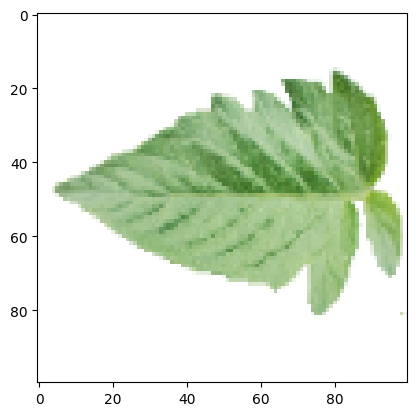

In [ ]:
plt.imshow(X_train[1530])
print(y_train[1530])

In [ ]:
X_train

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

# Normalización

In [ ]:
#Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
X_train = np.array(X_train).astype(float) / 255
X_test = np.array(X_test).astype(float) / 255

In [ ]:
X_train[0][25:75][25:75]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.45490196, 0.5372549 , 0.38823529],
        [0.43921569, 0.52156863, 0.36862745],
        [0.50588235, 0.57647059, 0.41568627]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.55686275, 0.63137255, 0.48235294],
        [0.44705882, 0.52941176, 0.38039216],
        [0.38431373, 0.46666667, 0.32156863]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.63137255, 0.70196078, 0.58039216],
        [0.56862745, 0.65098039, 0.50196078],
        [0.46666667, 0.55686275, 0.42352941]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()
data_values = [tensor.numpy() for tensor in y_train]
y_encoded = label_encoder.fit_transform(data_values)

# Convertir las etiquetas codificadas en formato one-hot encoding
y_onehot_train = to_categorical(y_encoded, num_classes=3)  # 3 clases en total

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()
data_values = [tensor.numpy() for tensor in y_test]
y_encoded = label_encoder.fit_transform(data_values)

# Convertir las etiquetas codificadas en formato one-hot encoding
y_onehot_test = to_categorical(y_encoded, num_classes=3)  # 3 clases en total

In [ ]:
print(y_onehot_train)
print(y_onehot_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
len(y_train)

2492

In [ ]:
#Convertir etiquetas en arreglo simple
y_train = np.array(y_train)

In [ ]:
y_train

array([<tf.Tensor: shape=(), dtype=string, numpy=b'MediaAlta'>,
       <tf.Tensor: shape=(), dtype=string, numpy=b'Sanas'>,
       <tf.Tensor: shape=(), dtype=string, numpy=b'Sanas'>, ...,
       <tf.Tensor: shape=(), dtype=string, numpy=b'Sanas'>,
       <tf.Tensor: shape=(), dtype=string, numpy=b'Baja'>,
       <tf.Tensor: shape=(), dtype=string, numpy=b'Baja'>], dtype=object)

In [ ]:
X_train.shape

(2492, 100, 100, 3)

In [ ]:
X_train[0].shape

(100, 100, 3)

# Construcción de modelo

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

# calculate total number of classes
# for output layer
print("Cantidad de clases:", 3)

# Build the model using the functional API
# input layer
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(3, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

Cantidad de clases: 3


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,167,267 (73.12 MB)

 Trainable params: 19,166,371 (73.11 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

# Entrenamiento de modelo

In [ ]:
tensorboardDenso = TensorBoard(log_dir='logs/new_model')
r = model.fit(X_train, y_onehot_train, validation_data=(X_test, y_onehot_test), epochs=100, callbacks=[tensorboardDenso])

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9298 - loss: 0.1936 - val_accuracy: 0.9607 - val_loss: 0.1157
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9492 - loss: 0.1406 - val_accuracy: 0.9775 - val_loss: 0.0599
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9809 - loss: 0.0643 - val_accuracy: 0.9700 - val_loss: 0.0816
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9798 - loss: 0.0547 - val_accuracy: 0.8221 - val_loss: 0.4603
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9839 - loss: 0.0373 - val_accuracy: 0.9906 - val_loss: 0.0358
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9846 - loss: 0.0442 - val_accuracy: 0.3109 - val_loss: 4.5868
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9766 - loss: 0.0756 - val_accuracy: 0.9738 - val_loss: 0.0650
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9887 - loss: 0.0329 - val_accuracy: 0.

- Evaluación del modelo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_onehot_test)
print('Test accuracy:', accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9900 - loss: 0.0156
Test accuracy: 0.9906367063522339


In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True,
  vertical_flip=True)

train_generator = data_generator.flow(X_train, y_onehot_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

tensorboardDenso = TensorBoard(log_dir='logs/new_model_AD')
r = model.fit(train_generator, validation_data=(X_test, y_onehot_test),
              steps_per_epoch=steps_per_epoch, epochs=100, callbacks=[tensorboardDenso])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9687 - loss: 0.0953 - val_accuracy: 0.9888 - val_loss: 0.0489
Epoch 2/100
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9688 - loss: 0.0540

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0540 - val_accuracy: 0.9888 - val_loss: 0.0482
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.9671 - loss: 0.0914 - val_accuracy: 0.9925 - val_loss: 0.0387
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0472 - val_accuracy: 0.9925 - val_loss: 0.0388
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.9654 - loss: 0.0882 - val_accuracy: 0.9850 - val_loss: 0.0581
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.4400 - val_accuracy: 0.9850 - val_loss: 0.0546
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9666 - loss: 0.1363 - val_accuracy: 0.9757 - val_loss: 0.1681
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0409 - val_accuracy: 0.9775 - val_loss: 0.1710
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.9658 - loss: 0.0976 - val_accuracy: 0.7172 - val

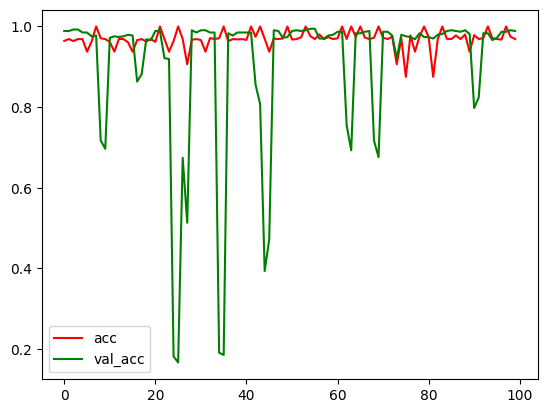

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

# Matriz de confusión

- sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) y_true y y_pred directamente en {0,1,2}
y_true = np.argmax(y_onehot_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# 2) Define los nombres de las 3 clases en el mismo orden de los enteros
classes = ['Sanas', 'Media-Alta', 'Baja']

# 3) Calcula la matriz de confusión para las etiquetas [0,1,2]
cm = confusion_matrix(y_true, y_pred, labels=[2,1,0])


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


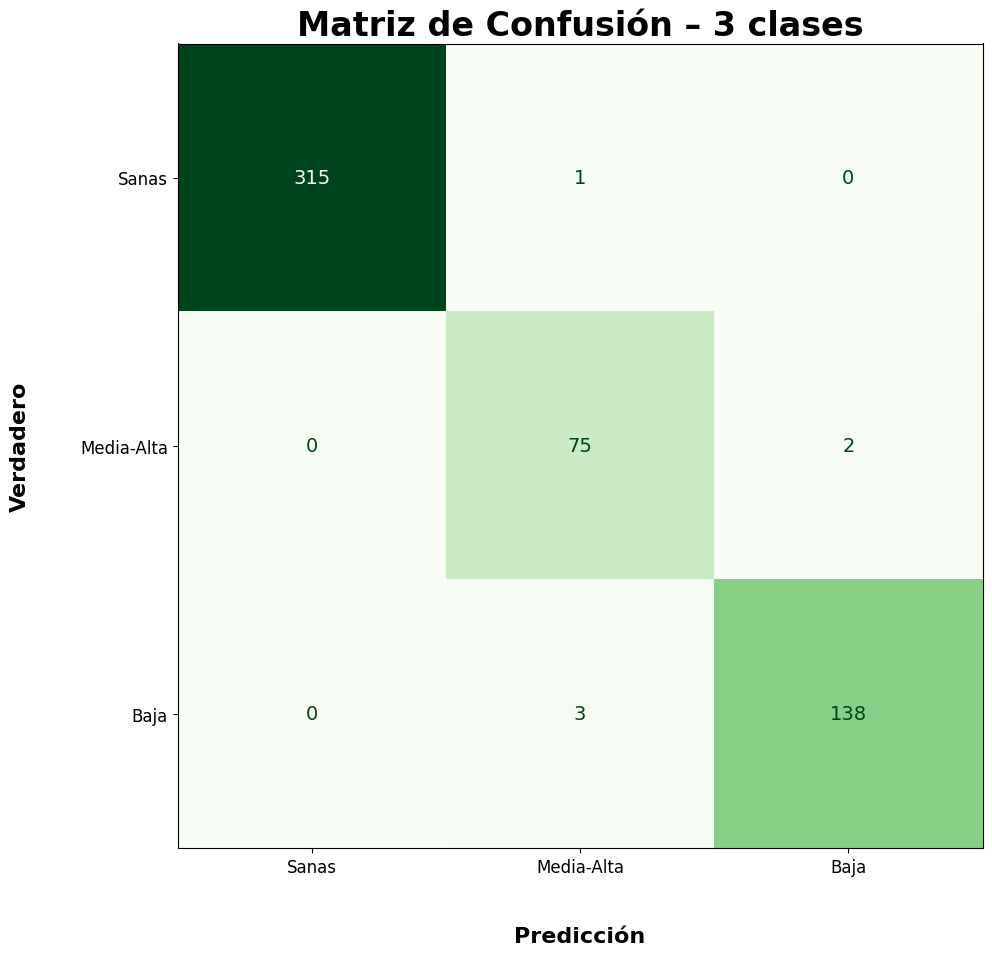

In [ ]:
# 4) Dibuja
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap= 'Greens', colorbar=False) # YlGn

# 2) Aumenta el tamaño de los números dentro de cada celda
#    disp.text_ es un array de objetos Text
for txt in disp.text_.ravel():
    txt.set_fontsize(14)

# 3) Etiquetas de ejes más grandes y en negrita
ax.set_xlabel("Predicción", fontsize=16, fontweight='bold', labelpad=36)
ax.set_ylabel("Verdadero",  fontsize=16, fontweight='bold', labelpad=36)

# 4) Título más grande
ax.set_title("Matriz de Confusión – 3 clases", fontsize=24, fontweight='bold')

# 5) Aumenta el tamaño de los ticks (números de los ejes)
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

# Prueba

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
La etiqueta original es baja y la etiqueta predecida es baja


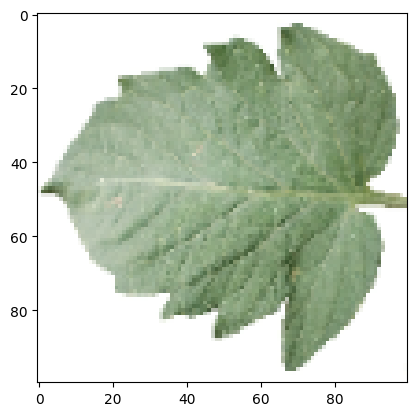

In [ ]:
# label mapping

labels = '''baja media_alta sana'''.split()

# select the image from our test dataset
image_number = 212

# display the image
plt.imshow(X_test[image_number])

# load the image in an array
n = np.array(X_test[image_number])

# reshape it
p = n.reshape(1, 100, 100, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[int(np.argmax(y_onehot_test[image_number]))]

# display the result
print("La etiqueta original es {} y la etiqueta predecida es {}".format(
    original_label, predicted_label))

In [ ]:
#Cargar la extension de tensorboard de colab
%reload_ext tensorboard

In [ ]:
#Ejecutar tensorboard e indicarle que lea la carpeta "logs"
%tensorboard --logdir logs

<IPython.core.display.Javascript object>